<a href="https://colab.research.google.com/github/sakathia/DATA201/blob/main/Team_Project_2_Linear_Regression_EV_DOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2: Electric Vehicle Registrations in WA
### Team Members: Walter Hinkley, Asher Scott, Ifreador Gedeon, Sandra Aching, Ryan Seabold

## Introduction:

BEV's Vs PHEV's Vs ICE vehicles are the current options when purchasing an automobile. BEV being a fully electric battery powered car, PHEV or hybrid vehicle is a electric and gas powered car, ICE or internal combustion engine vehicle. BEV is the most efficient as far as energy at almost 90% and ICE is lowest between 20-40%. Hybrids are somewhere inbetween depending on how much the electric motor is used vs gas powered engine.

Other benefits of BEV adn PHEV is that they have far less emissions and damage the environment less.

The Electric Vehicle Population Size History By County CSV was obtained from DATA.GOV
This shows the number of vehicles that were registered by Washington State
Department of Licensing (DOL) each month. The data is separated by county
for passenger vehicles and trucks. We picked this dataset because we were curious about the trends in vehicle registrations and how they differ across counties in Washington State.

Data Source : https://catalog.data.gov/dataset/electric-vehicle-population-size-history-by-county

## Questions:
*   How are overall EV adoptions performing overtime?
*   How is EV adoption in the State of Washington performing over time?



## Exploratory Data Analysis

In [2]:
#importing the needed libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

In [3]:
#Loading and reading the dataset
orig_data = "/content/Electric_Vehicle_Population_Size_History_By_County.csv"
Electric = pd.read_csv(orig_data)
Electric.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,November 30 2021,Douglas,CO,Passenger,1,1,2,93,95,2.11
1,January 31 2023,Plaquemines,LA,Passenger,1,1,2,20,22,9.09
2,August 31 2020,Loudoun,VA,Passenger,1,0,1,83,84,1.19
3,August 31 2017,Mason,WA,Truck,0,0,0,19330,19330,0.00
4,June 30 2022,Lee,FL,Passenger,1,0,1,45,46,2.17


In [4]:
Electric = Electric.rename(columns={
    "Battery Electric Vehicles (BEVs)": "BEVs",
    "Plug-In Hybrid Electric Vehicles (PHEVs)": "PHEVs",
    "Non-Electric Vehicle Total": "Non Evs Total",
    "Electric Vehicle (EV) Total": "Total Evs"})

In [5]:
Electric.columns

Index(['Date', 'County', 'State', 'Vehicle Primary Use', 'BEVs', 'PHEVs',
       'Total Evs', 'Non Evs Total', 'Total Vehicles',
       'Percent Electric Vehicles'],
      dtype='object')

In [6]:
#Removing NAs
Electric = Electric.dropna()


In [7]:
Electric.isnull().sum()

,0
Date,0
County,0
State,0
Vehicle Primary Use,0
BEVs,0
PHEVs,0
Total Evs,0
Non Evs Total,0
Total Vehicles,0
Percent Electric Vehicles,0


In [8]:
Electric['Date'] = pd.to_datetime(Electric['Date'])

# Create new columns for Month, Day, and Year
Electric['Month'] = Electric['Date'].dt.month_name()  # Full month name
Electric['Day'] = Electric['Date'].dt.day
Electric['Year'] = Electric['Date'].dt.year

Electric['Date'] = pd.to_datetime(Electric['Date'])
print(Electric[["Date", "Year", "Month"]].head())

        Date  Year     Month
0 2021-11-30  2021  November
1 2023-01-31  2023   January
2 2020-08-31  2020    August
3 2017-08-31  2017    August
4 2022-06-30  2022      June


In [9]:
Electric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26387 entries, 0 to 26485
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       26387 non-null  datetime64[ns]
 1   County                     26387 non-null  object        
 2   State                      26387 non-null  object        
 3   Vehicle Primary Use        26387 non-null  object        
 4   BEVs                       26387 non-null  int64         
 5   PHEVs                      26387 non-null  int64         
 6   Total Evs                  26387 non-null  int64         
 7   Non Evs Total              26387 non-null  int64         
 8   Total Vehicles             26387 non-null  int64         
 9   Percent Electric Vehicles  26387 non-null  float64       
 10  Month                      26387 non-null  object        
 11  Day                        26387 non-null  int32         
 12  Year     

In [10]:
Electric.describe()

,Date,BEVs,PHEVs,Total Evs,Non Evs Total,Total Vehicles,Percent Electric Vehicles,Day,Year
count,26387,26387.000000,26387.000000,26387.000000,2.638700e+04,2.638700e+04,26387.000000,26387.000000,26387.000000
mean,2021-07-26 17:59:16.614999808,252.872286,85.226665,338.098950,2.273484e+04,2.307294e+04,4.746233,30.428090,2021.038314
min,2017-01-31 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000,28.000000,2017.000000
25%,2019-08-31 00:00:00,0.000000,0.000000,1.000000,3.600000e+01,3.700000e+01,0.490000,30.000000,2019.000000
50%,2021-09-30 00:00:00,1.000000,0.000000,1.000000,1.220000e+02,1.250000e+02,1.590000,31.000000,2021.000000
75%,2023-07-31 00:00:00,3.000000,1.000000,4.000000,5.581000e+03,5.582000e+03,4.000000,31.000000,2023.000000
max,2025-03-31 00:00:00,93335.000000,22027.000000,115362.000000,1.398963e+06,1.430060e+06,100.000000,31.000000,2025.000000
std,NaN,2831.579428,748.144836,3570.482806,1.014733e+05,1.042425e+05,11.226481,0.834848,2.319610


In [11]:
Electric.shape

(26387, 13)

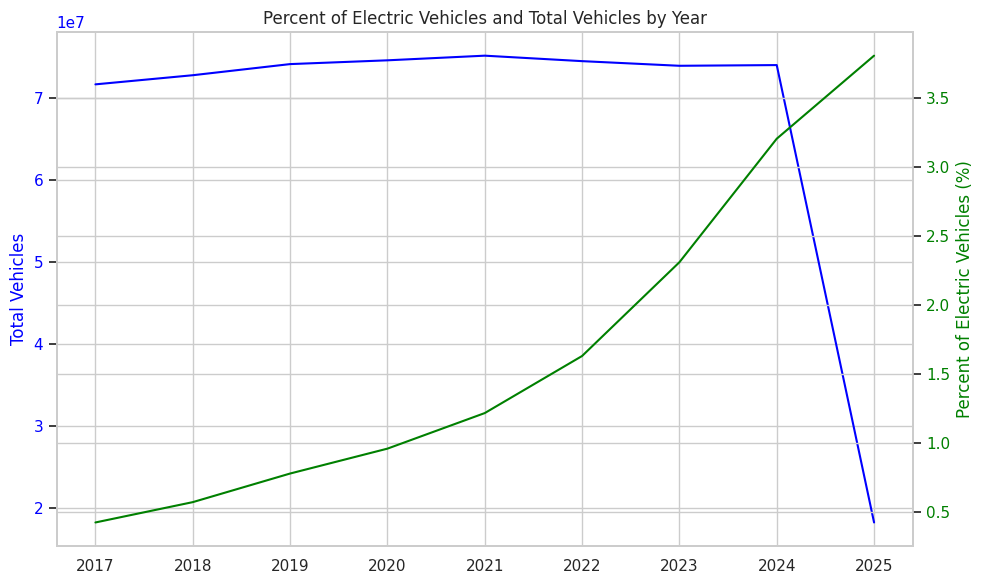

In [19]:
sns.set_theme(style="whitegrid")
yearly = Electric.groupby('Year')[['BEVs', 'PHEVs', 'Total Evs', 'Total Vehicles']].sum().reset_index()

# Calculate percent of electric vehicles
yearly['Percent EV'] = (yearly['Total Evs'] / yearly['Total Vehicles']) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total vehicle count
ax1.plot(yearly['Year'], yearly['Total Vehicles'], color='blue', label='Total Vehicles')
ax1.set_ylabel('Total Vehicles', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for percent EV
ax2 = ax1.twinx()
ax2.plot(yearly['Year'], yearly['Percent EV'], color='green', label='Percent EV')
ax2.set_ylabel('Percent of Electric Vehicles (%)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Titles and labels
plt.title('Percent of Electric Vehicles and Total Vehicles by Year')
fig.tight_layout()
plt.show()

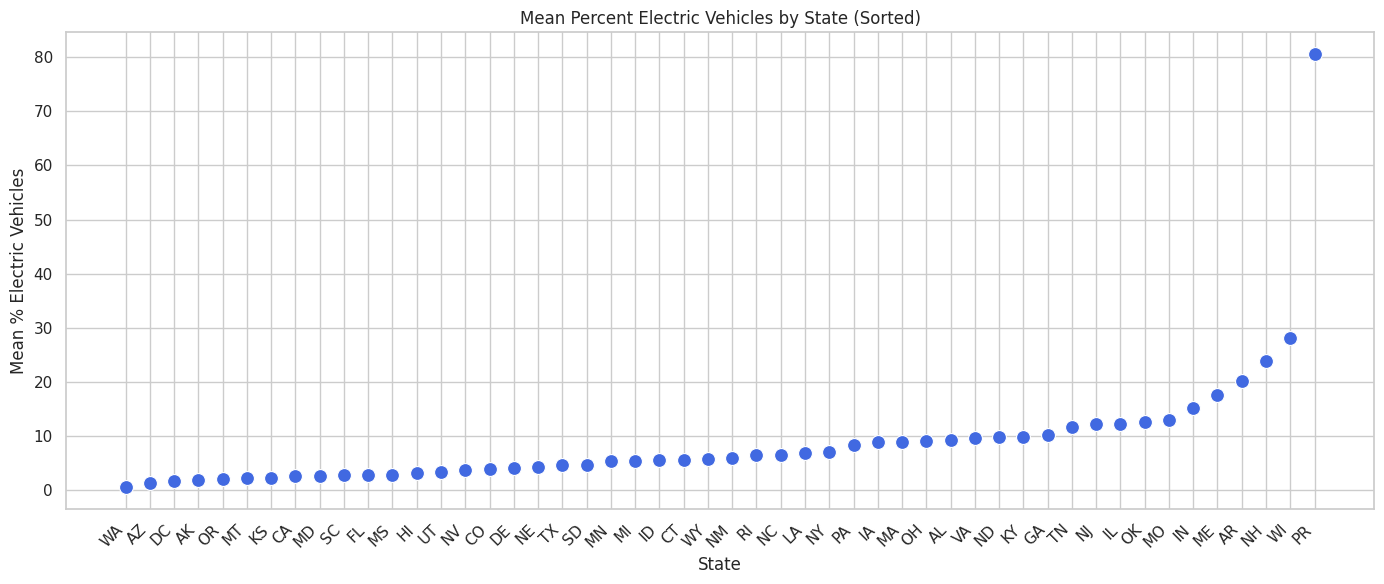

In [20]:
#Group by State and calculate mean Percent Electric Vehicles
state_means = Electric.groupby("State")["Percent Electric Vehicles"].mean().reset_index()

# Sort by Percent Electric Vehicles
state_means = state_means.sort_values(by="Percent Electric Vehicles")

#Made a Scatter plot
plt.figure(figsize=(14, 6))
sns.scatterplot(data=state_means, x="State", y="Percent Electric Vehicles", s=100, color="royalblue")
plt.xticks(rotation=45, ha='right')
plt.title("Mean Percent Electric Vehicles by State (Sorted)")
plt.ylabel("Mean % Electric Vehicles")
plt.xlabel("State")
plt.tight_layout()
plt.show()

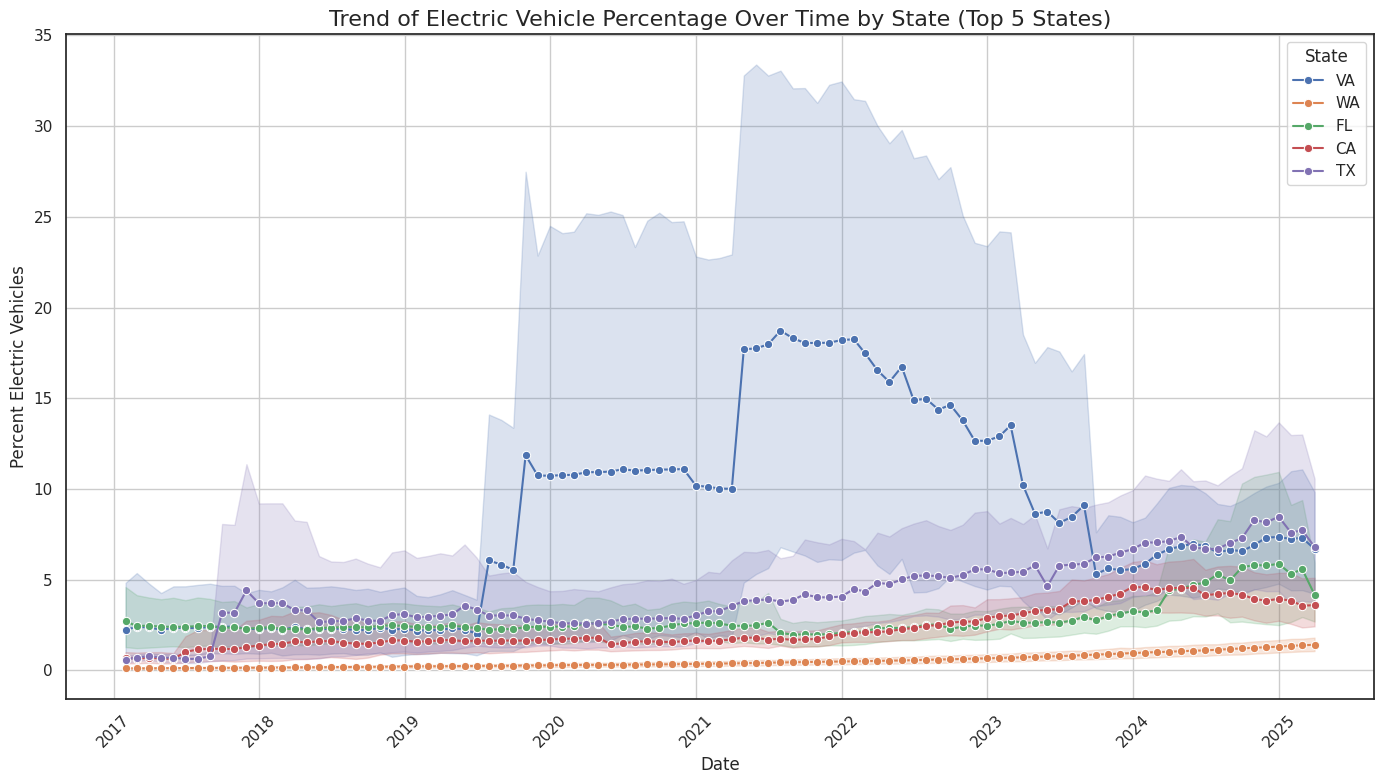

In [29]:
# Drop rows with missing state or date
df_ev_clean = Electric.dropna(subset=['State', 'Date'])

# Find top 5 states by number of records
top_states = df_ev_clean['State'].value_counts().head(5).index

# Filter to top 5 states
df_top_states = df_ev_clean[df_ev_clean['State'].isin(top_states)]

# Create the plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_top_states, x='Date', y='Percent Electric Vehicles', hue='State', marker='o')
plt.title('Trend of Electric Vehicle Percentage Over Time by State (Top 5 States)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Percent Electric Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [13]:
Electric_WA = Electric[Electric['State'] == 'WA']

In [14]:
Electric_WA.shape

(7722, 13)

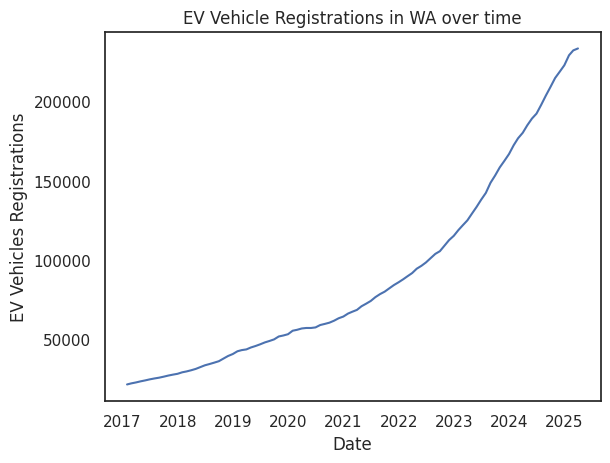

In [23]:
sns.set_theme(style="white")
monthly_totals = Electric_WA.groupby('Date')['Total Evs'].sum().reset_index()
sns.lineplot(data=monthly_totals, x='Date', y='Total Evs')
plt.title('EV Vehicle Registrations in WA over time')
plt.xlabel('Date')
plt.ylabel('EV Vehicles Registrations')
plt.show()

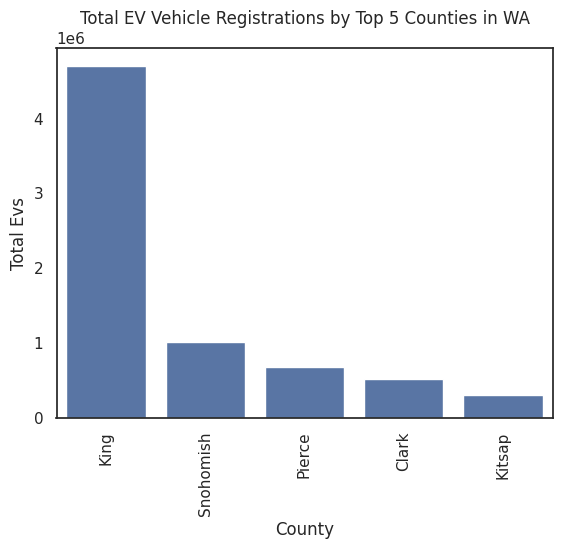

In [22]:
county_EVtotals = Electric_WA.groupby('County')['Total Evs'].sum().reset_index().sort_values(by='Total Evs', ascending=False).head(5)
sns.barplot(data=county_EVtotals, x='County', y='Total Evs')
plt.xticks(rotation=90)
plt.title('Total EV Vehicle Registrations by Top 5 Counties in WA')
plt.show()

## Linear Regression : Predicting Electric Vehicle Percentages

In [ ]:
Elec_Pred_perc= Electric_WA[['Total Vehicles', 'BEVs', 'PHEVs', 'Non Evs Total', 'Year']]
X = Elec_Pred_perc.values
y = Electric_WA["Percent Electric Vehicles"].values

In [ ]:
X.shape

(7722, 5)

In [ ]:
y.shape

(7722,)

In [ ]:
type(X)

numpy.ndarray

Scikit Learn accepts Numpy arrays as well as Pandas data frames

We split the data into train and test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)

We instantiate the linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()

In [ ]:
X_train.shape, y_train.shape

((5405, 5), (5405,))

In [ ]:
X_test.shape, y_test.shape

((2317, 5), (2317,))

We fit the training data to a linear model

In [ ]:
LinReg.fit(X_train, y_train)

LinearRegression()

We use the model to predict the test data

In [ ]:
y_predicted = LinReg.predict(X_test)

We measure the accuracy of the model by using the mean square error (MSE)

Let us use Numpy first

In [ ]:
mean_sq_error = np.mean( (y_test - y_predicted) **2 )
print(mean_sq_error)

0.40002101437468923


Let us use sklearn metrics next

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_true = y_test, y_pred = LinReg.predict(X_test)))

0.40002101437468923


What is the error on the training data

In [ ]:
print(mean_squared_error(y_true = y_train, y_pred = LinReg.predict(X_train)))

0.4613552446353762


In [ ]:
### How much does the model (the x variable) explain  the variability of the response data around its mean?

In [ ]:
LinReg.score(X_test, y_test)

0.45559567705714954

The model explains approximately 45.6% of the variance in the percent of electric vehicles

Let us check the histogram of the residuals. Does it satisfy the assumptions for inference?

(array([1.490e+02, 1.534e+03, 5.080e+02, 8.500e+01, 1.700e+01, 1.100e+01,
        5.000e+00, 1.000e+00, 5.000e+00, 2.000e+00]),
 array([-1.42169553, -0.63497654,  0.15174245,  0.93846144,  1.72518043,
         2.51189942,  3.29861841,  4.0853374 ,  4.87205639,  5.65877538,
         6.44549438]),
 <BarContainer object of 10 artists>)

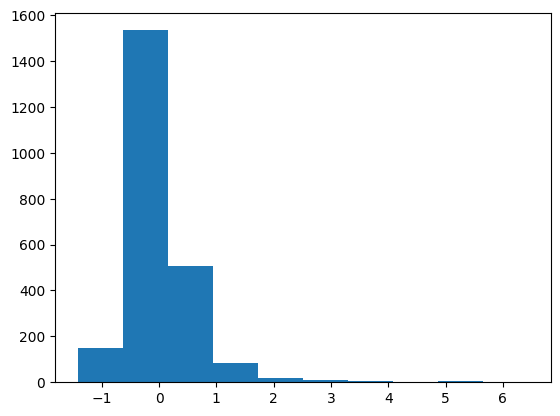

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_test - y_predicted)

The Histogram of the residuals shows a slightly normal distribution with a slight skew to the right.

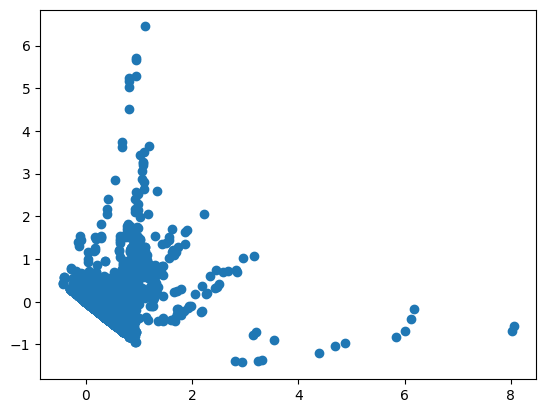

In [ ]:
plt.scatter(y_predicted, y_test - y_predicted)

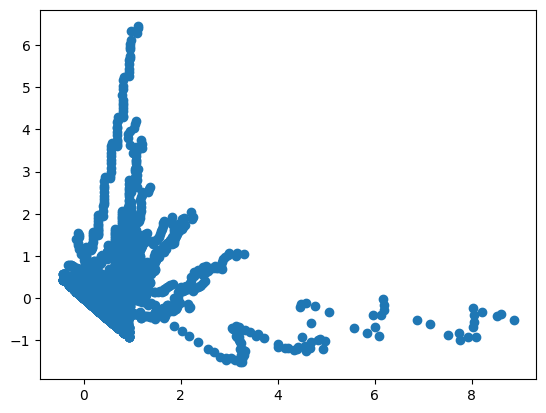

In [ ]:
plt.scatter(LinReg.predict(X), y - LinReg.predict(X))

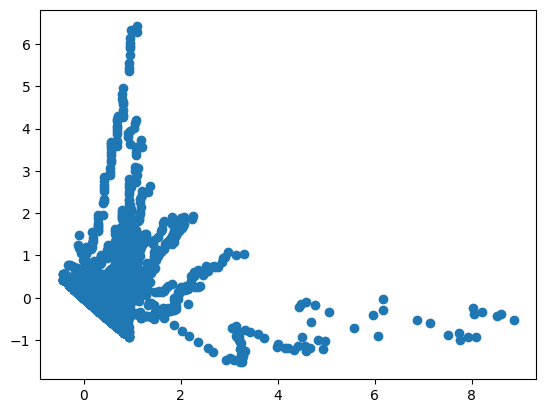

In [ ]:
plt.scatter(LinReg.predict(X_train), y_train - LinReg.predict(X_train))

The residual and predicted plots show some spread but no clear patterns, suggesting homoscedasticity is met.

In [ ]:
print(LinReg.coef_)


[ 0.00034413 -0.00061496  0.00130568 -0.0003466   0.11249561]


The coefficients attrbuted to the following variables:

*   Total Vehicles: 0.00034413
*   BEVs: -0.00061496
*   PHEVs: 0.00130568
*   Non Evs Total: -0.0003466
*   Year: 0.11249561







PHEVs and Year have the most positive impact on EV percentage, while BEVs, and Non Evs Total have a negative impact on EV percentage.

In [ ]:
print(LinReg.intercept_)

-226.86239675684467


## Conclusion
Our model shows that Total Vehicles, BEVs, PHEVs, Non-EVs, and Year explain about 45.6% of the variation in percentage of electric vehicle adoption across Washington state. The model performs moderately well, and we saw that Year and PHEVs had the biggest positive influence on the percentage of EVs. The residual plots have met the homoscedasticity overall, meaning the model's assumptions mostly held up. In the future, we believe it would be good to look at data with factors like income levels, gas prices, and vehicle prices that may help to expand our analysis.